In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data from the csv file
data = pd.read_csv('BP_data.csv')
print(data)

    Patient ID   Blood Pressure Before (mmHg)   Blood Pressure After (mmHg)
0            1                            130                           120
1            2                            142                           135
2            3                            120                           118
3            4                            135                           127
4            5                            148                           140
..         ...                            ...                           ...
95          96                            136                           129
96          97                            143                           137
97          98                            127                           123
98          99                            139                           135
99         100                            135                           130

[100 rows x 3 columns]


# a. Measure the dispersion in both and interpret the results.

In [2]:
# Calculate dispersion measures for 'Blood Pressure Before'
bp_before_dispersion = {
    'Range': data[' Blood Pressure Before (mmHg)'].max() - data[' Blood Pressure Before (mmHg)'].min(),
    'Variance': data[' Blood Pressure Before (mmHg)'].var(),
    'Standard Deviation': data[' Blood Pressure Before (mmHg)'].std()
}

# Calculate dispersion measures for 'Blood Pressure After'
bp_after_dispersion = {
    'Range': data[' Blood Pressure After (mmHg)'].max() - data[' Blood Pressure After (mmHg)'].min(),
    'Variance': data[' Blood Pressure After (mmHg)'].var(),
    'Standard Deviation': data[' Blood Pressure After (mmHg)'].std() 
}

print("Dispersion measures for 'Blood Pressure Before':") 
for measure, value in bp_before_dispersion.items():
    print(f"{measure}: {value}")
    
print("\nDispersion measures for 'Blood Pressure After':")
for measure, value in bp_after_dispersion.items():
    print(f"{measure}: {value}")

Dispersion measures for 'Blood Pressure Before':
Range: 28
Variance: 43.53727272727272
Standard Deviation: 6.598278012275076

Dispersion measures for 'Blood Pressure After':
Range: 23
Variance: 47.44484848484848
Standard Deviation: 6.888022102523226


# b. Calculate mean and 5% confidence interval and plot it in a graph


Mean Blood Pressure Before: 133.91
5% Confidence Interval for Blood Pressure Before: (133.49624324587668, 134.3237567541233)

Mean Blood Pressure After: 128.36
5% Confidence Interval for Blood Pressure After: (127.92807432754914, 128.79192567245087)


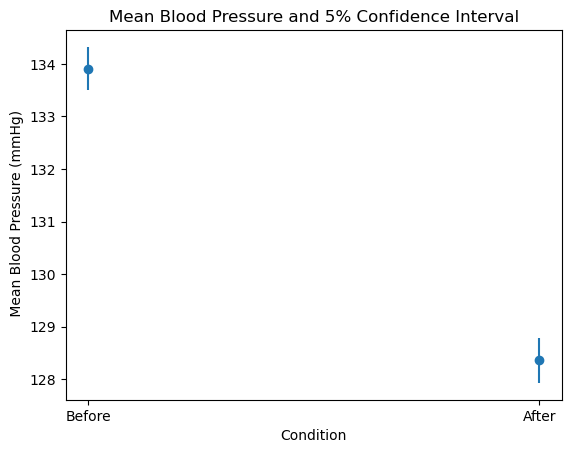

In [8]:
mean_before = data[' Blood Pressure Before (mmHg)'].mean()
mean_after = data[' Blood Pressure After (mmHg)'].mean()

confidence_interval_before = stats.norm.interval(0.05, loc=mean_before, 
                                                 scale=data[' Blood Pressure Before (mmHg)'].std())
confidence_interval_after = stats.norm.interval(0.05, loc=mean_after, 
                                                scale=data[' Blood Pressure After (mmHg)'].std())

print(f"\nMean Blood Pressure Before: {mean_before}")
print(f"5% Confidence Interval for Blood Pressure Before: {confidence_interval_before}")

print(f"\nMean Blood Pressure After: {mean_after}")
print(f"5% Confidence Interval for Blood Pressure After: {confidence_interval_after}")

# Plotting mean and confidence interval
plt.errorbar(['Before', 'After'], [mean_before, mean_after], yerr=[mean_before - confidence_interval_before[0], 
                                                          mean_after - confidence_interval_after[0]], fmt='o')
plt.xlabel('Condition')
plt.ylabel(' Mean Blood Pressure (mmHg)')
plt.title('Mean Blood Pressure and 5% Confidence Interval')
plt.show()

# c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.

In [5]:
# Calculate Mean Absolute Deviation and Standard Deviation
mad_before = np.mean(np.abs(data[' Blood Pressure Before (mmHg)'] - mean_before))
mad_after = np.mean(np.abs(data[' Blood Pressure After (mmHg)'] - mean_after))
std_before = data[' Blood Pressure Before (mmHg)'].std()
std_after = data[' Blood Pressure After (mmHg)'].std()

print(f"\nMean Absolute Deviation (MAD) for Blood Pressure Before: {mad_before}")
print(f"Standard Deviation (SD) for Blood Pressure Before: {std_before}")

print(f"\nMean Absolute Deviation (MAD) for Blood Pressure After: {mad_after}")
print(f"Standard Deviation (SD) for Blood Pressure After: {std_after}")


Mean Absolute Deviation (MAD) for Blood Pressure Before: 5.7118
Standard Deviation (SD) for Blood Pressure Before: 6.598278012275076

Mean Absolute Deviation (MAD) for Blood Pressure After: 5.9
Standard Deviation (SD) for Blood Pressure After: 6.888022102523226


# d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [13]:
# Calculate correlation coefficient and check significance at 1% level
correlation_coefficient, p_value = stats.pearsonr(data[' Blood Pressure Before (mmHg)'], 
                                                  data[' Blood Pressure After (mmHg)'])

significance = "significant" if p_value < 0.01 else "not significant"

print('''The correlation coefficient between Blood Pressure Before and Blood Pressure After is ''' 
      + str(correlation_coefficient))
print(f"P-value: {p_value}")
print("The correlation is " + significance + " at the 1% level of significance.")

The correlation coefficient between Blood Pressure Before and Blood Pressure After is 0.9779485966556017
P-value: 1.8097381433072956e-68
The correlation is significant at the 1% level of significance.
